In [21]:
from csv import reader
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
company_list = ['YHOO', 'GOOG', 'GOOGL', 'FB', 'TWTR', 'MSFT']

### USING Randon Predictions

In [23]:
for company in company_list:
    with open('./Stocks/'+company+'14_17.csv','r') as f:
        data = list(reader(f))

    data = np.array(data)
    data_open = data[1:,1:2]
    actual = np.zeros(data_open.shape)

    for i in range(actual.shape[0]-1):
        if(data_open[i+1] > data_open[i]):
            actual[i+1] = 1;
    
    data_open_actual = np.stack((data_open, actual),axis=-1)

    pred1 = np.remainder(np.abs(np.floor((np.random.randn(len(data_open),1) * 10))),2)
    pos = 0.0;
    for i in range(len(data_open)):
        if (actual[i] == pred1[i]):
            pos = pos + 1;
    accuracy = (pos/len(data_open))*100
    print()
    print(company)
    print(accuracy)


YHOO
49.48320413436693

GOOG
50.0

GOOGL
52.19638242894057

FB
50.90439276485789

TWTR
47.9328165374677

MSFT
52.0671834625323


# USING Previous k Values

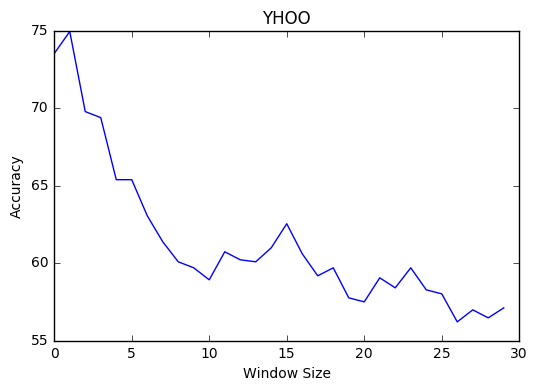

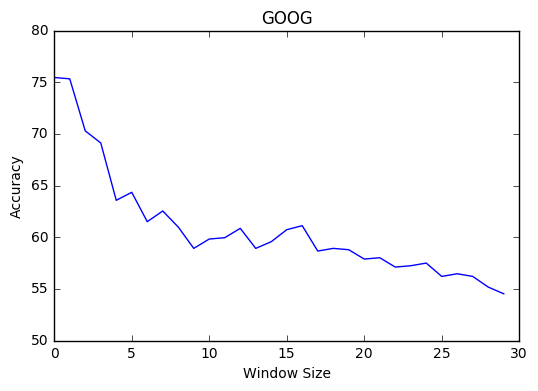

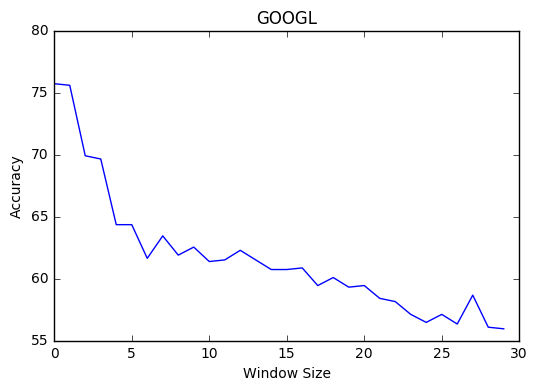

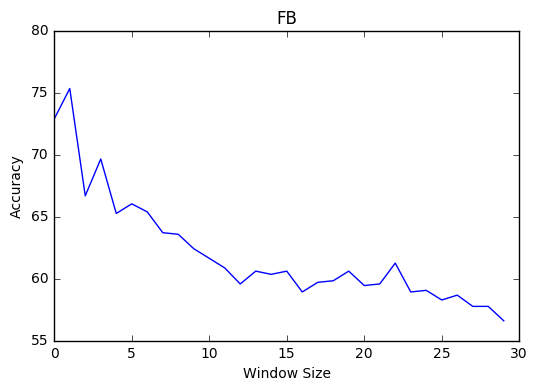

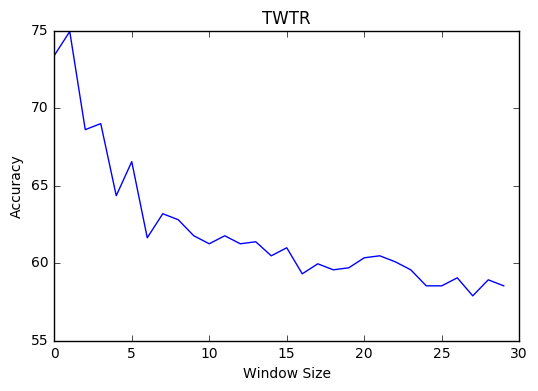

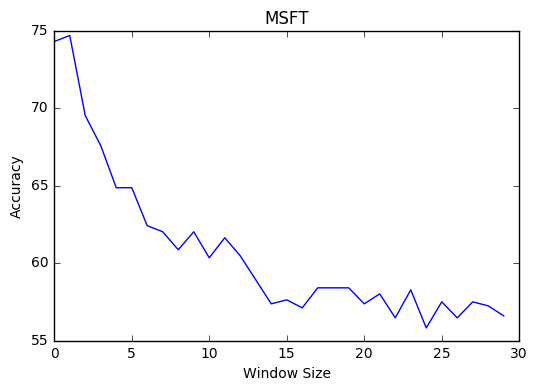

In [25]:
#%matplotlib inline
for company in company_list:
    with open('./Stocks/'+company+'14_17.csv','r') as f:
        data = list(reader(f))

    data = np.array(data)
    data_open = data[1:,1:2]
    actual = np.zeros(data_open.shape)
    
    for i in range(actual.shape[0]-1):
        if(data_open[i+1] > data_open[i]):
            actual[i+1] = 1;
    
    pred2 = np.zeros(actual.shape)
    
    pred_list = []

    for k in range(1,31):
        pos = 0
        neg = 0
        for j in range(len(actual)):
            if (actual[j] == 1):
                pos = pos + 1
            else:
                neg = neg + 1

            if (j < k):
                pred2[j] = pred1[j]
            else:
                if (pos > neg):
                    pred2[j] = 1
                else:
                    pred2[j] = 0

                if (actual[j-k] == 1):
                    pos = pos-1;
                else:
                    neg= neg-1;

        pos = 0.0
        for i in range(pred2.shape[0]):
            if (actual[i] == pred2[i]):
                pos = pos + 1;
        accuracy = (pos/actual.shape[0])*100
        pred_list.append(accuracy)
        
    plt.title(company)
    plt.plot(pred_list)
    plt.ylabel('Accuracy')
    plt.xlabel('Window Size')
    plt.show()